# Crimes in Chicago - Map Matching

In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
from tqdm import tqdm

In [2]:
data = pd.read_csv("pre_data.csv")
print(data.shape)
data.head()

(6407290, 23)


ID Case Number        Date                                Block  \
0  11665567    JC234307  2019-10-04                   102XX S VERNON AVE   
1  11667968    JC237058  2019-04-19                  002XX N LARAMIE AVE   
2  11667963    JC235212  2019-12-04                   032XX N KEELER AVE   
3  11668309    JC238187  2019-04-25  108XX S DR MARTIN LUTHER KING JR DR   
4  11692179    JC261724  2019-05-13                   090XX S RACINE AVE   

   IUCR                Primary Type                     Description  \
0  1562                 SEX OFFENSE       AGG CRIMINAL SEXUAL ABUSE   
1  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
2  1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
3  0486                     BATTERY         DOMESTIC BATTERY SIMPLE   
4  0560                     ASSAULT                          SIMPLE   

       Location Description  Arrest  Domestic  ...  FBI Code  Year   Latitude  \
0  SCHOOL, PUBLIC, BUILDING   False     False  ...        17  2019  41.708589   
1                 RESIDENCE   False      True  ...        17  2019  41.884865   
2                 RESIDENCE   False      True  ...        02  2019  41.940298   
3                 RESIDENCE   False      True  ...       08B  2019  41.697609   
4                    STREET   False     False  ...       08A  2019  41.729973   

   Longitude    Weekday  Week Number  Weekend      Time  Seconds  Hours  
0 -87.612583     Friday           40    False  16:37:00    59820     16  
1 -87.755230     Friday           16    False  13:57:00    50220     13  
2 -87.732066  Wednesday           49    False  16:08:00    58080     16  
3 -87.613508   Thursday           17    False  17:20:00    62400     17  
4 -87.653167     Monday           20    False  17:26:00    62760     17  

[5 rows x 23 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407290 entries, 0 to 6407289
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Weekday               object 
 18  Week Number           int64  
 19  Weekend               bool   
 20  Time                  object 
 21  Seconds               int64  
 22  Hours                 int64  
dtypes: bool

In [4]:
data = data[ (data["Location Description"] == "STREET") & (data["Year"] >= 2010) ]
data.shape

(688013, 23)

In [5]:
data_xy = pd.DataFrame({ "x" : data["Longitude"], "y" : data["Latitude"] })
data_xy

x          y
4       -87.653167  41.729973
30      -87.761095  41.924782
33      -87.703493  41.745639
35      -87.684345  42.016919
37      -87.726516  41.906199
...            ...        ...
6407270 -87.723462  41.888974
6407273 -87.569915  41.771240
6407276 -87.731600  41.878797
6407279 -87.767016  41.931266
6407289 -87.659682  41.864278

[688013 rows x 2 columns]

In [6]:
place = "Chicago, Illinois, USA"
G = ox.graph_from_place(place, network_type="drive", which_result=1)
N, E = ox.graph_to_gdfs(G,nodes=True, edges=True)

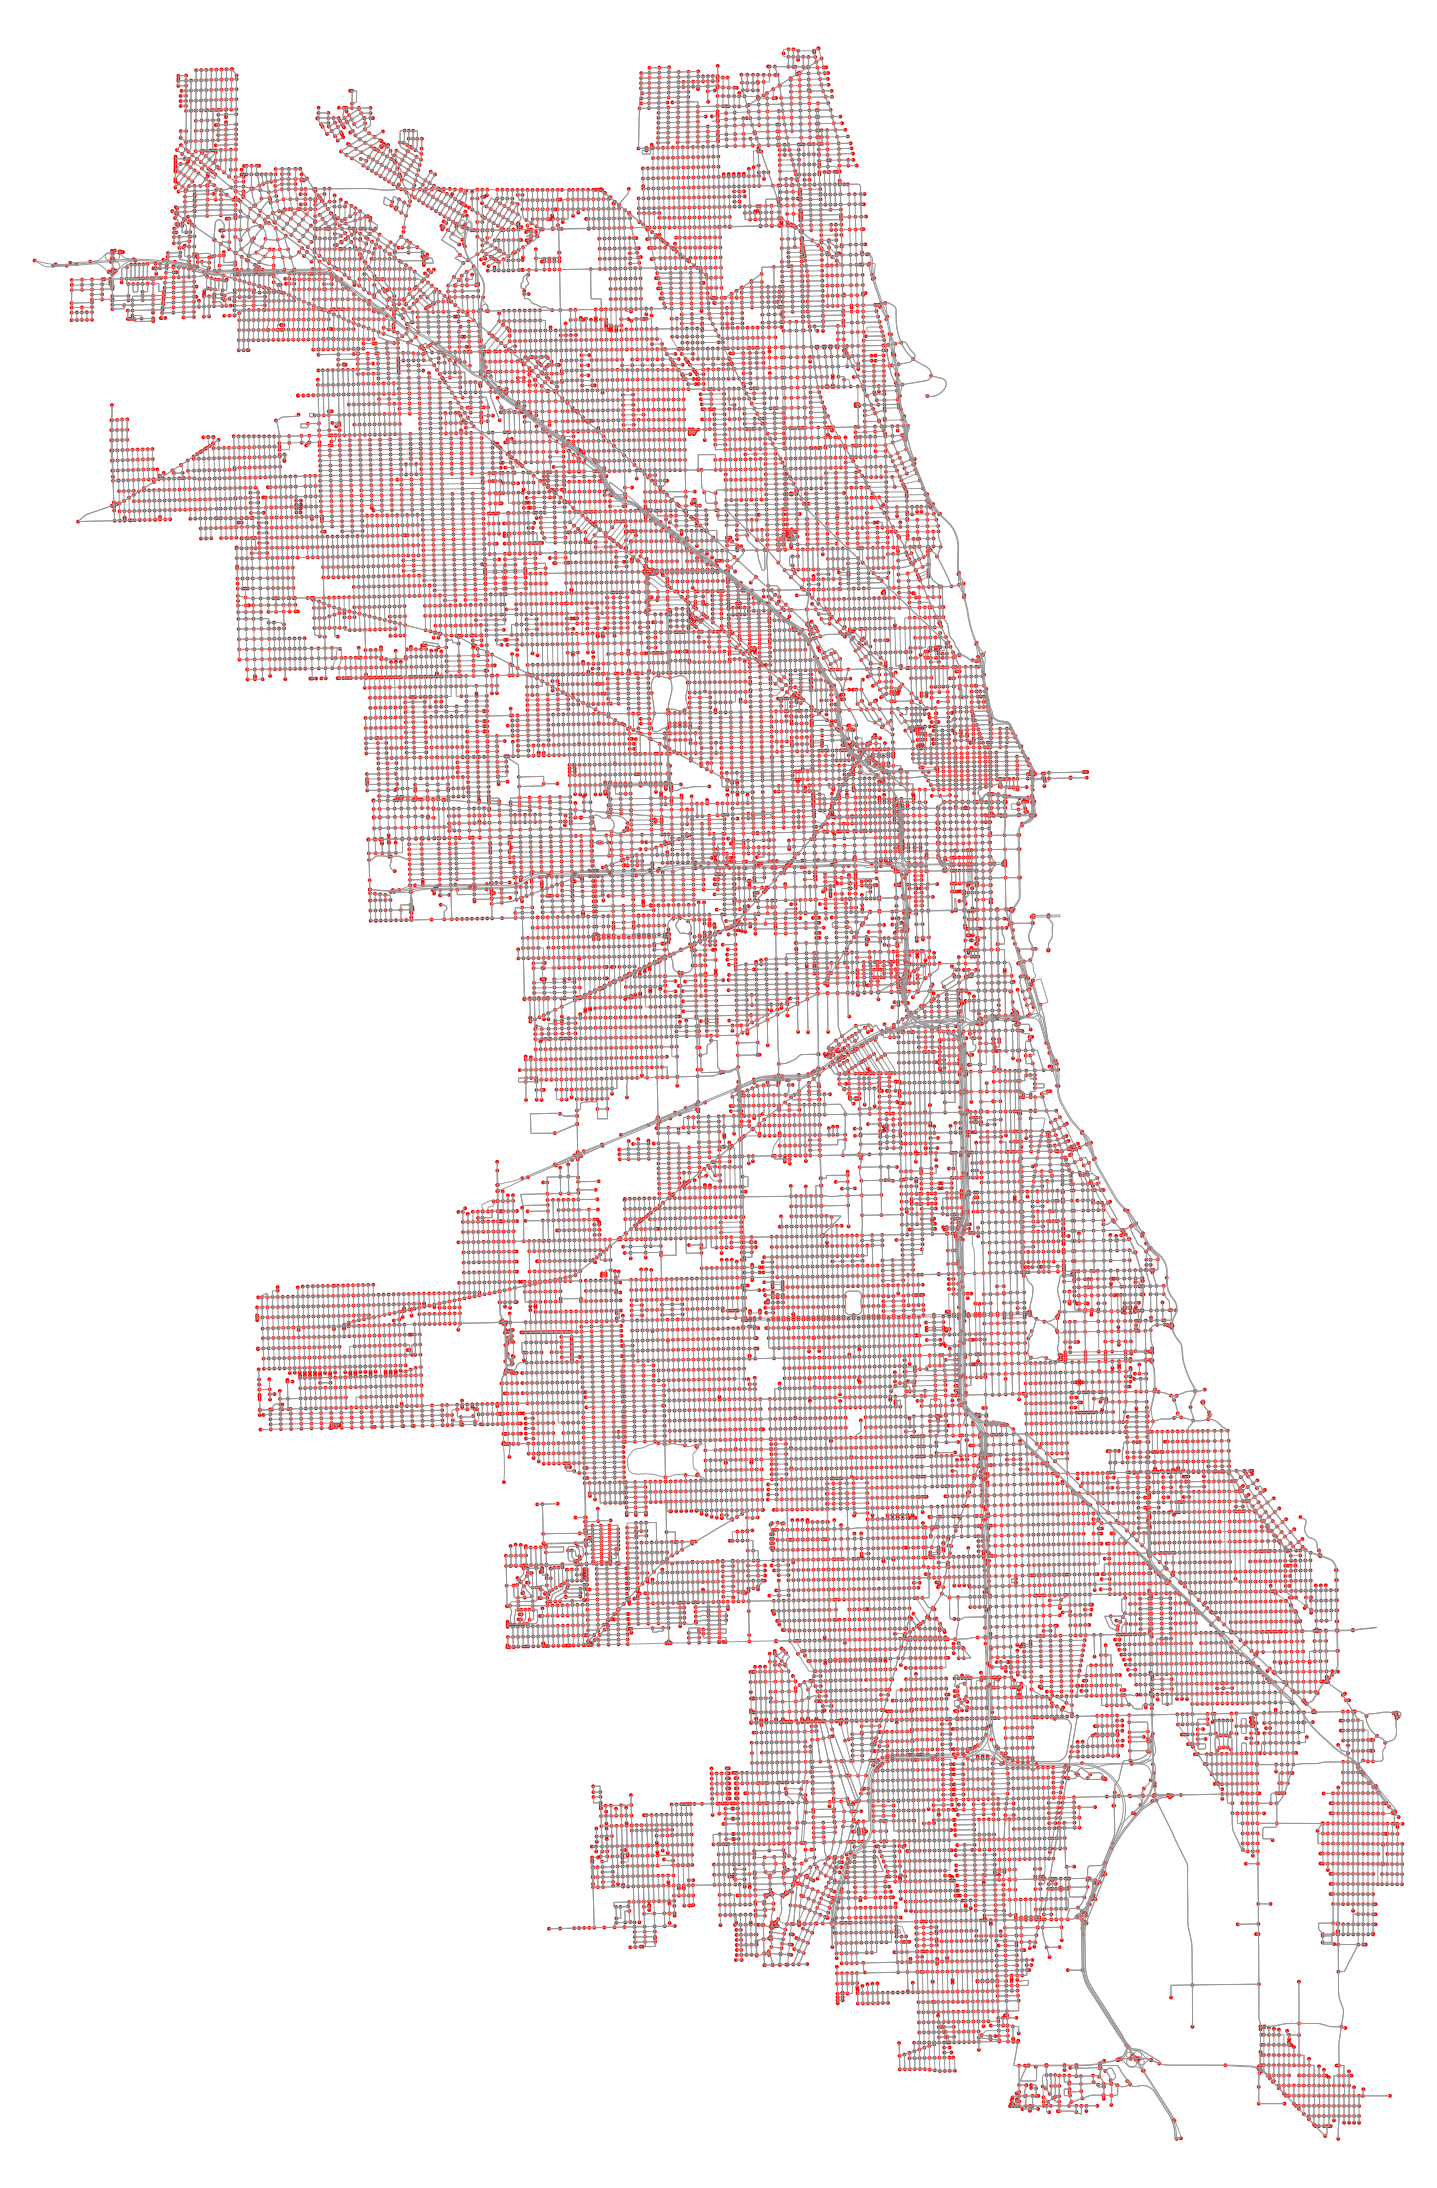

(<Figure size 2529.17x2880 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8d4cd857d0>)

In [7]:
ox.plot_graph(G, node_color='#ff0000', edge_color='#999999' ,bgcolor='w',fig_height=40)

In [8]:
N.head(3)

y          x      osmid highway  ref  \
261226496  41.784753 -87.797444  261226496     NaN  NaN   
261292033  41.658183 -87.634029  261292033     NaN  NaN   
261226498  41.784732 -87.798690  261226498     NaN  NaN   

                             geometry  
261226496  POINT (-87.79744 41.78475)  
261292033  POINT (-87.63403 41.65818)  
261226498  POINT (-87.79869 41.78473)

In [9]:
E.head(3)

u          v  key     osmid  oneway                  name  \
0  261226496  261307236    0  24106153    True  South Nordica Avenue   
1  261226496  261226498    0  32804145   False      West 59th Street   
2  261226496  261141456    0  32804145   False      West 59th Street   

       highway   length                                           geometry  \
0  residential  204.040  LINESTRING (-87.79744 41.78475, -87.79752 41.7...   
1  residential  103.352  LINESTRING (-87.79744 41.78475, -87.79808 41.7...   
2  residential  105.085  LINESTRING (-87.79744 41.78475, -87.79681 41.7...   

  lanes bridge  ref tunnel maxspeed service access junction area  
0   NaN    NaN  NaN    NaN      NaN     NaN    NaN      NaN  NaN  
1   NaN    NaN  NaN    NaN      NaN     NaN    NaN      NaN  NaN  
2   NaN    NaN  NaN    NaN      NaN     NaN    NaN      NaN  NaN

In [10]:
E["index"] = E.index
E["dens"] = 1
E.drop( labels=['lanes', 'ref', 'maxspeed', 'access', 'tunnel', 'bridge', 'junction', 'area', 'service'], 
      axis=1,inplace=True)
E.head(3)

u          v  key     osmid  oneway                  name  \
0  261226496  261307236    0  24106153    True  South Nordica Avenue   
1  261226496  261226498    0  32804145   False      West 59th Street   
2  261226496  261141456    0  32804145   False      West 59th Street   

       highway   length                                           geometry  \
0  residential  204.040  LINESTRING (-87.79744 41.78475, -87.79752 41.7...   
1  residential  103.352  LINESTRING (-87.79744 41.78475, -87.79808 41.7...   
2  residential  105.085  LINESTRING (-87.79744 41.78475, -87.79681 41.7...   

   index  dens  
0      0     1  
1      1     1  
2      2     1

In [11]:
nearest_edges = ox.geo_utils.get_nearest_edges( G, X=data_xy["x"].values, Y=data_xy["y"].values, method="balltree" )
nearest_edges

array([[261240040, 261240038],
       [315582630, 261147094],
       [261199219, 261137995],
       ...,
       [261188745, 261188743],
       [261253128, 261115413],
       [261148959, 261151293]])

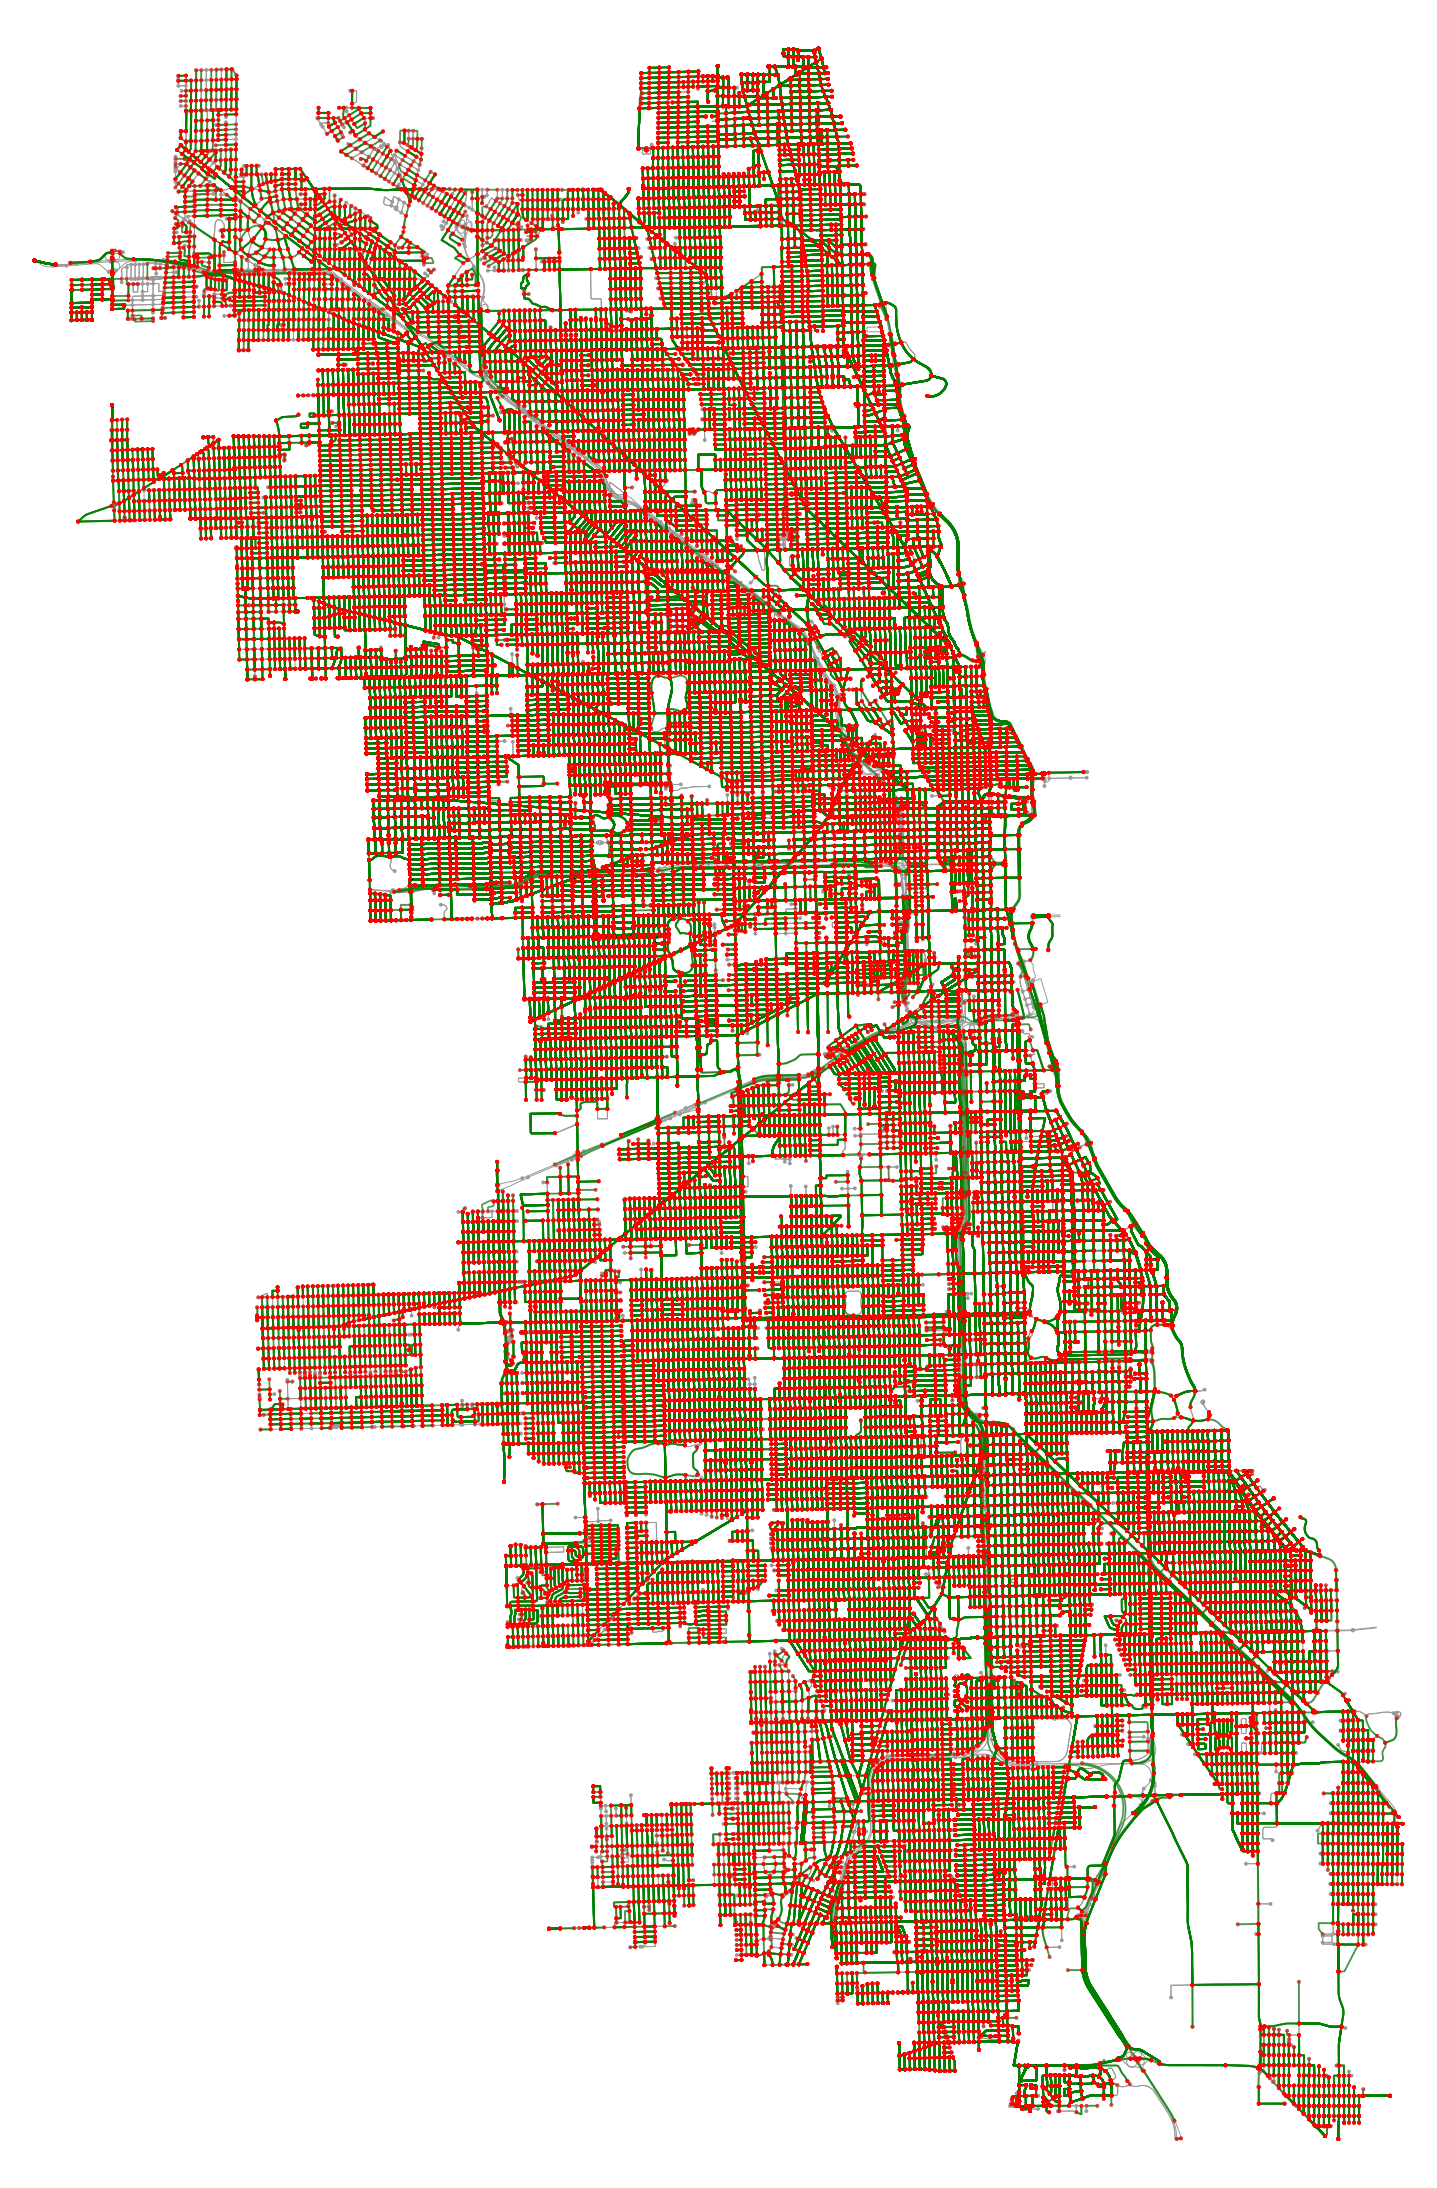

(<Figure size 2529.17x2880 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8d4a8d71d0>)

In [12]:
ox.plot_graph_routes( G, nearest_edges, route_linewidth=2, route_color="green", orig_dest_node_size=15, orig_dest_node_color="red", fig_height=40)

In [13]:
new_edges = []
for u, v in tqdm(nearest_edges):
    mask = (E['u'] == u) & (E['v'] == v)
    new_edges.append(E[mask].sort_values(by='length').values[0])

100%|██████████| 688013/688013 [41:03<00:00, 279.31it/s]


In [14]:
new_E = gpd.GeoDataFrame(new_edges, columns=E.columns)
new_E.head(3)

u          v  key      osmid  oneway                 name  \
0  261240040  261240038    0   24094740   False  South Racine Avenue   
1  315582630  261147094    0  682990059   False    North Long Avenue   
2  261199219  261137995    0   24086427   False  South Sawyer Avenue   

       highway   length                                           geometry  \
0  residential  202.754  LINESTRING (-87.65313 41.72864, -87.65318 41.7...   
1  residential  204.414  LINESTRING (-87.76106 41.92405, -87.76108 41.9...   
2  residential  203.562  LINESTRING (-87.70346 41.74431, -87.70351 41.7...   

   index  dens  
0  14239     1  
1  29739     1  
2  42349     1

In [15]:
new_E.head()

u          v  key      osmid  oneway                 name  \
0  261240040  261240038    0   24094740   False  South Racine Avenue   
1  315582630  261147094    0  682990059   False    North Long Avenue   
2  261199219  261137995    0   24086427   False  South Sawyer Avenue   
3  261304672  261265682    0  110579666   False   North Ridge Avenue   
4  261296316  261250147    0   24104032   False    West Grand Avenue   

       highway   length                                           geometry  \
0  residential  202.754  LINESTRING (-87.65313 41.72864, -87.65318 41.7...   
1  residential  204.414  LINESTRING (-87.76106 41.92405, -87.76108 41.9...   
2  residential  203.562  LINESTRING (-87.70346 41.74431, -87.70351 41.7...   
3    secondary  161.784  LINESTRING (-87.68428 42.01650, -87.68438 42.0...   
4    secondary   28.708  LINESTRING (-87.72672 41.90629, -87.72641 41.9...   

   index  dens  
0  14239     1  
1  29739     1  
2  42349     1  
3  13071     1  
4   4974     1

In [16]:
aux = new_E.groupby("index").sum()["dens"]

In [17]:
new_E_2 = new_E.drop_duplicates("index").copy()
new_E_2["dens"] = new_E_2["index"].apply(lambda x : aux[x] )
new_E_2.head(3)

u          v  key      osmid  oneway                 name  \
0  261240040  261240038    0   24094740   False  South Racine Avenue   
1  315582630  261147094    0  682990059   False    North Long Avenue   
2  261199219  261137995    0   24086427   False  South Sawyer Avenue   

       highway   length                                           geometry  \
0  residential  202.754  LINESTRING (-87.65313 41.72864, -87.65318 41.7...   
1  residential  204.414  LINESTRING (-87.76106 41.92405, -87.76108 41.9...   
2  residential  203.562  LINESTRING (-87.70346 41.74431, -87.70351 41.7...   

   index  dens  
0  14239    40  
1  29739    34  
2  42349    12

In [32]:
new_E_2[new_E_2['dens'] >= 50].shape

(2003, 11)

In [33]:
new_E_dense = new_E_2[new_E_2['dens'] >= 100]

In [34]:
new_G = ox.gdfs_to_graph(N, new_E_dense)

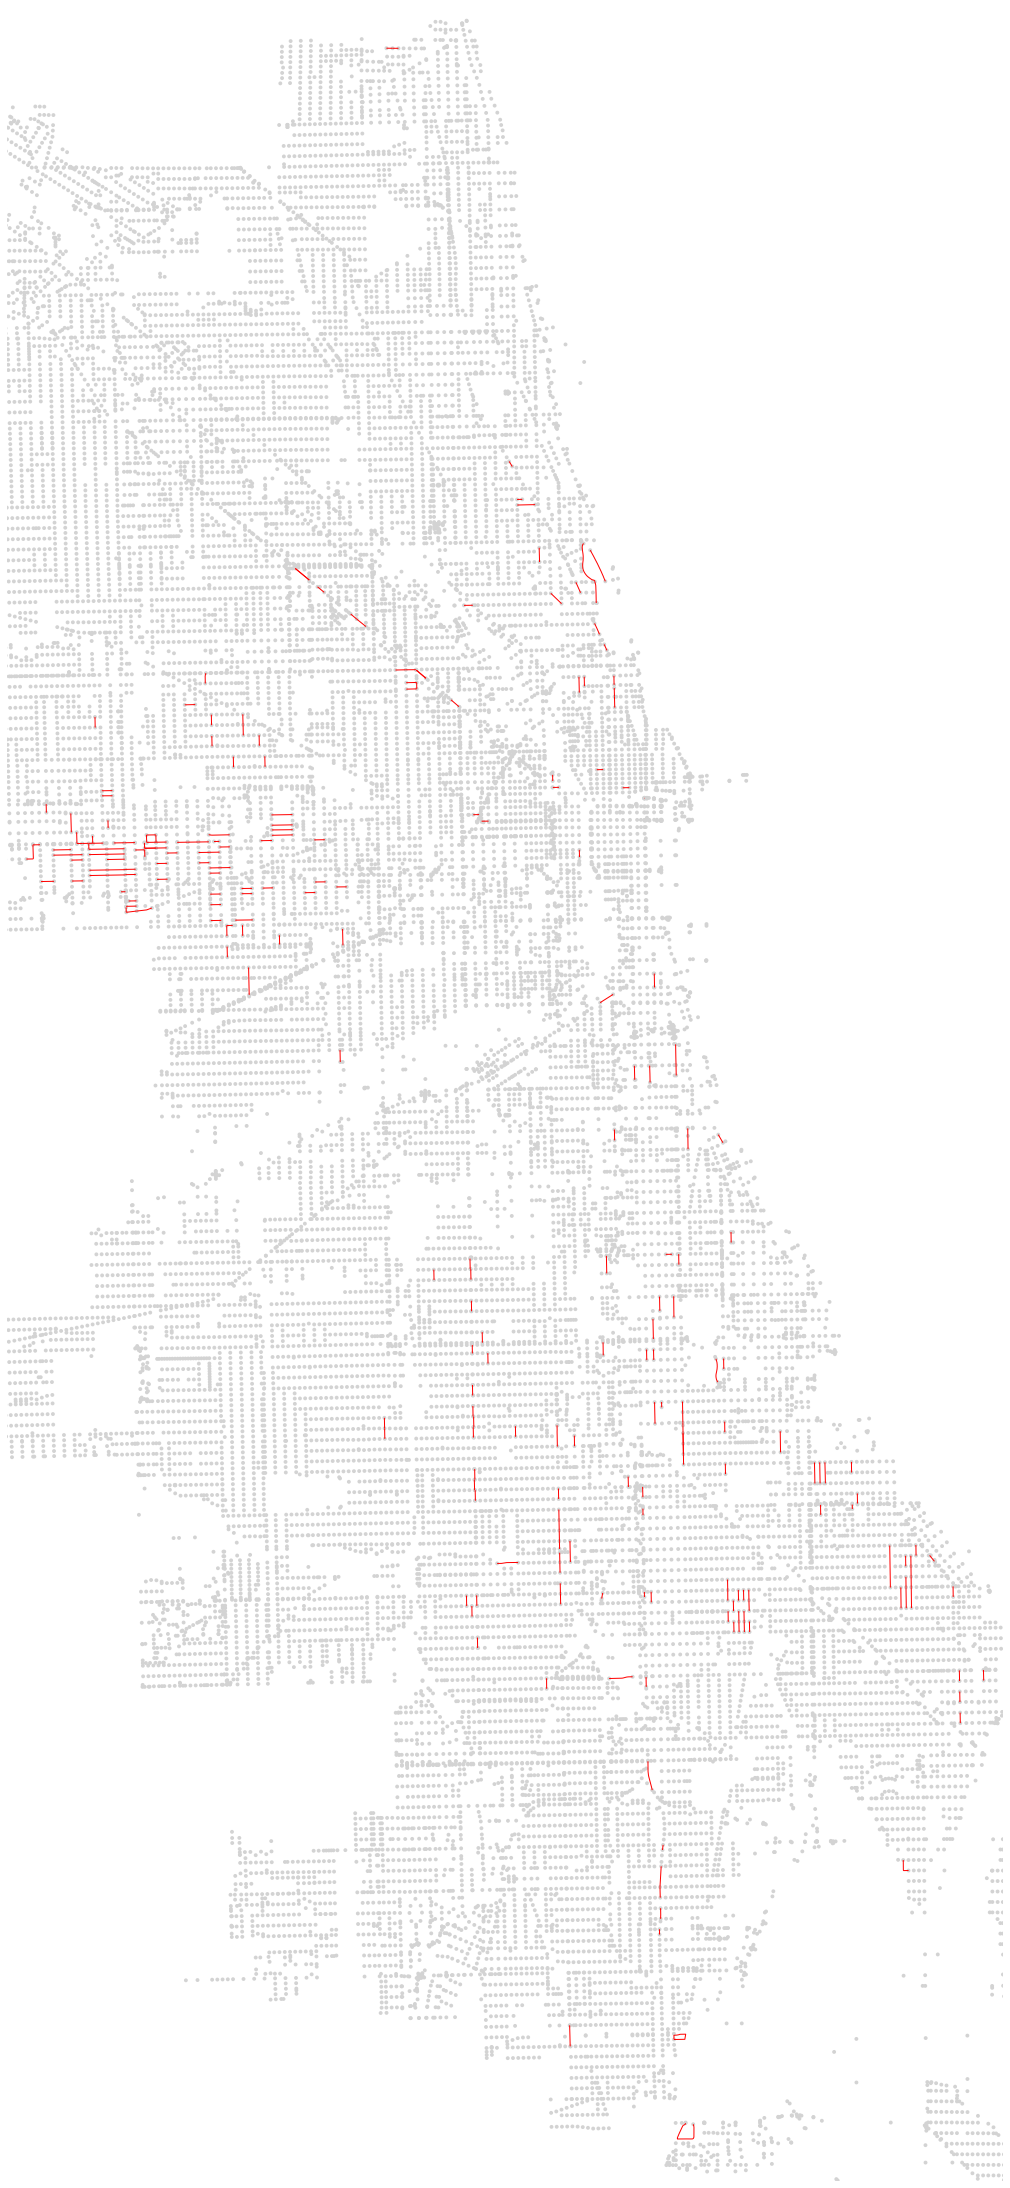

(<Figure size 1769.89x2880 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8d4aa75590>)

In [37]:
ox.plot_graph(new_G,fig_height=40, edge_color='red', node_color='lightgray')